In [1]:
import pandas as pd 
import numpy as no
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
df = pd.read_csv("../../Data Files/7. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv", parse_dates=[0])

In [5]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [6]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


# Sarima

Sarima(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

### Seasonal elements

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period

In [7]:
df.index = df["Month"]

In [8]:
df.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

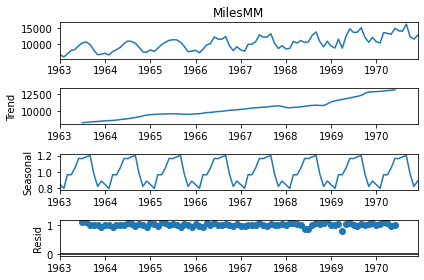

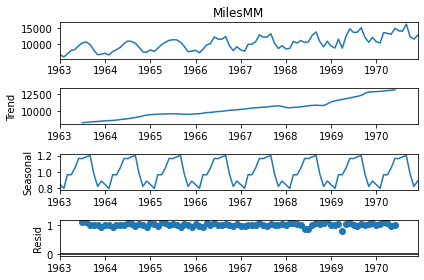

In [12]:
result_a = seasonal_decompose(df["MilesMM"], model = "multiplicative")
result_a.plot()

In [18]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [19]:
model = SARIMAX(df["MilesMM"], order=(4,1,3), seasonal_order=(1,1,1,12))

C:\Users\lucho\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [20]:
model_fit = model.fit()

In [21]:
residuals = model_fit.resid

<AxesSubplot:xlabel='Month'>

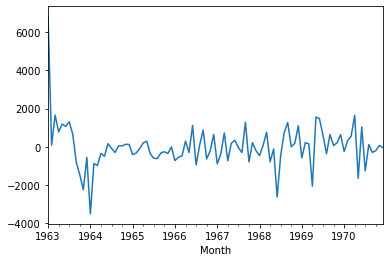

In [22]:
residuals.plot()

In [23]:
output = model_fit.forecast()

In [25]:
output

1971-01-01    11464.861433
Freq: MS, dtype: float64

In [26]:
model_fit.forecast(12)

1971-01-01    11464.861433
1971-02-01    11423.025551
1971-03-01    13623.426620
1971-04-01    12998.015608
1971-05-01    14031.992361
1971-06-01    15954.446586
1971-07-01    14948.894502
1971-08-01    15560.107195
1971-09-01    16774.808795
1971-10-01    13836.690976
1971-11-01    12310.641372
1971-12-01    13834.193085
Freq: MS, Name: predicted_mean, dtype: float64

In [27]:
yhat = model_fit.predict()

In [28]:
yhat.head()

1963-01-01       0.000000
1963-02-01    6084.106904
1963-03-01    5422.636393
1963-04-01    7382.517432
1963-05-01    7274.110706
Freq: MS, Name: predicted_mean, dtype: float64

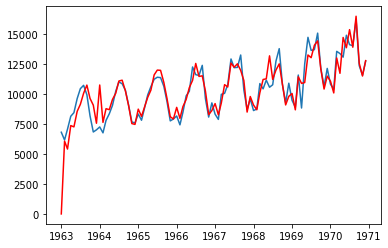

In [30]:
plt.plot(df["MilesMM"])
plt.plot(yhat, color = "red")